In [9]:
# Eksempel med eksponentialfordeling

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pylab

In [11]:
# Parametere
beta = 200

In [12]:
# Anta normalfordeling
nSamp = 10000
count = 0
nObs = 15
alpha = 0.05
for b in range(nSamp):
    # Draw a sample from true distribution
    xObs = stats.expon.rvs(scale = beta, size = nObs)

    # Estimate mean and variance
    muEst = np.mean(xObs)
    varEst = np.var(xObs, ddof=1)

    # Under normal assumption
    tCrit = stats.t.ppf(alpha, df = nObs-1)
    tObs = (muEst-200)/np.sqrt(varEst/nObs)
    if tObs <= tCrit:
        count = count+1
count /= nSamp
print(count)
print("95% CI: ", round(count, 3), "±", round(1.960*np.sqrt(count*(1-count)/nSamp), 3), sep = "")

0.1178
95% CI: 0.118±0.006


In [14]:
# Bruk parametrisk regel basert på Exp(\beta)
nSamp = 10000
count = 0
nObs = 15
alpha = 0.05
for b in range(nSamp):
    # Draw a sample from true distribution
    xObs = stats.expon.rvs(scale = beta, size = nObs)

    # Estimate mean and variance
    muEst = np.mean(xObs)

    # Under normal assumption
    tCrit = 123.2867
    tObs = muEst
    if tObs <= tCrit:
        count = count+1
count /= nSamp
print(count)
print("95% CI: ", round(count, 3), "±", round(1.960*np.sqrt(count*(1-count)/nSamp), 3), sep = "")

0.0484
95% CI: 0.048±0.004


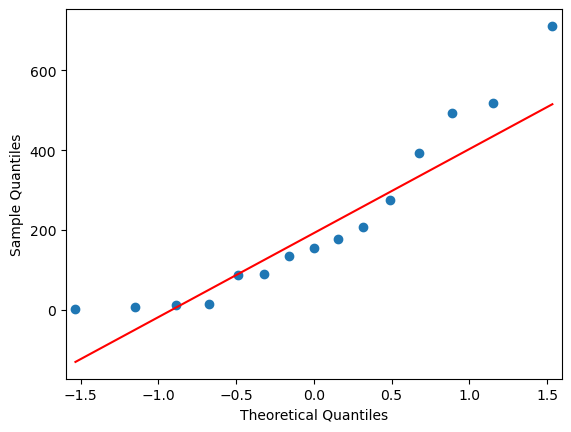

In [15]:
# Kunne vi oppdaget problemet med normalfordelingsplott?
np.random.seed(seed=2414)
xObs = stats.expon.rvs(scale = beta, size = nObs)
sm.qqplot(xObs, line = "q")
pylab.show()

In [17]:
# Simuler data for fortegnstest
trueMedian = 600
np.random.seed(seed=2414)
betaNew = trueMedian/np.log(2)
xObs = stats.expon.rvs(scale = betaNew, size = 15)
print(xObs)
print("p-verdi (fortegnstest): ", round(2*stats.binom.cdf(np.sum(xObs > 1000), 15, 0.5), 3))

# Eksakt test
betaH0 = 1000/np.log(2)
print("p-verdi (parametrisk):  ", round(2*stats.chi2.cdf(2/betaH0*np.sum(xObs), df = 30), 3))

[ 773.30536724   12.90806594  375.29008245  901.20419905 2137.6996298
 2237.98518361   49.17085322  578.93195215   33.32444591 1699.93120324
 1193.32518952  671.82174543 3077.83261154  384.42077016   61.73999028]
p-verdi (fortegnstest):  0.302
p-verdi (parametrisk):   0.15
